# Assignment 1:developing a python script that can enable teachers to identify student engagement.

Step 1: Data Cleaning [½+1+½ =2 point]
1. Read the CSV file.
2. Remove the rows where ID is “ #N/A” or “2” (Instructor’s User ID)
3. Display the new “cleaned” Data

In [1]:
!pip install pandas
import pandas as pd

You should consider upgrading via the 'c:\users\prati\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
df=pd.read_csv("Asg1.csv")

In [4]:
df.head()

,Time,ID,Event context,Component,Event name,Origin
0,"14/08/20, 19:53",2.0,Front page,Logs,Log report viewed,web
1,"14/08/20, 19:51",2.0,Front page,System,Course viewed,web
2,"14/08/20, 19:50",2.0,Course: Introduction to Learning Analytics,System,Course viewed,web
3,"14/08/20, 19:50",2.0,System,System,User has logged in,web
4,"14/08/20, 15:42",2.0,Course: Introduction to Learning Analytics,System,Course viewed,web


In [5]:
df.dropna(subset = ["ID"], inplace=True)

In [6]:
df

,Time,ID,Event context,Component,Event name,Origin
0,"14/08/20, 19:53",2.0,Front page,Logs,Log report viewed,web
1,"14/08/20, 19:51",2.0,Front page,System,Course viewed,web
2,"14/08/20, 19:50",2.0,Course: Introduction to Learning Analytics,System,Course viewed,web
3,"14/08/20, 19:50",2.0,System,System,User has logged in,web
4,"14/08/20, 15:42",2.0,Course: Introduction to Learning Analytics,System,Course viewed,web
...,...,...,...,...,...,...
1397,"23/07/20, 16:18",2.0,Course: Introduction to Learning Analytics,System,Course created,web
1398,"23/07/20, 16:09",2.0,Front page,System,Course viewed,web
1399,"23/07/20, 16:09",2.0,Front page,System,Course viewed,web
1400,"23/07/20, 16:06",2.0,Front page,System,Course viewed,web


In [9]:
# remove rows with ID=2 i.e instructors user ID
Cleaned_data = df[(df['ID'] != 2)]

In [10]:
Cleaned_data


,Time,ID,Event context,Component,Event name,Origin
32,"7/08/20, 01:20",6.0,Assignment: Stop motion video,Assignment,The status of the submission has been viewed.,web
33,"7/08/20, 01:20",6.0,Assignment: Stop motion video,Assignment,Course module viewed,web
34,"7/08/20, 01:20",6.0,Assignment: Stop motion video,Assignment,A submission has been submitted.,web
36,"7/08/20, 01:20",6.0,Assignment: Stop motion video,File submissions,Submission created.,web
37,"7/08/20, 01:20",6.0,Assignment: Stop motion video,File submissions,A file has been uploaded.,web
...,...,...,...,...,...,...
1224,"25/07/20, 12:25",4.0,Course: Introduction to Learning Analytics,System,Grade item updated,web
1225,"25/07/20, 12:25",4.0,Course: Introduction to Learning Analytics,System,Badge listing viewed,web
1226,"25/07/20, 12:24",4.0,Course: Introduction to Learning Analytics,System,User list viewed,web
1227,"25/07/20, 12:24",4.0,System,System,User has logged in,web


Step 2: Action frequency. [4 point]
(In this step create a data frame name “action_frequency” with the following information.)

ID    Total # of login  # of assignments done   # of discussion created  # of quizzes taken
3
4
6


Note- The Event name for the above are- 

Login- User has logged in
Assignments done -A submission has been submitted. 
Discussion created - Discussion created
Quizzes taken - Quiz attempt submitted

In [22]:
df1=Cleaned_data.groupby(['ID','Event name'])['ID'].count()
df1


ID   Event name                      
3.0  A file has been uploaded.           2
     A submission has been submitted.    2
     Badge listing viewed                3
     Choice answer added                 2
     Comment created                     2
                                        ..
6.0  Wiki history viewed                 5
     Wiki page locks deleted             1
     Wiki page map viewed                5
     Wiki page updated                   1
     Wiki page viewed                    6
Name: ID, Length: 132, dtype: int64

In [37]:

df1=Cleaned_data.groupby(['Event name','ID'])['ID'].count()
df1

Event name                        ID 
A file has been uploaded.         3.0    2
                                  4.0    2
                                  6.0    3
A submission has been submitted.  3.0    2
                                  4.0    2
                                        ..
Wiki page updated                 4.0    1
                                  6.0    1
Wiki page viewed                  3.0    5
                                  4.0    3
                                  6.0    6
Name: ID, Length: 132, dtype: int64

In [60]:
cd= Cleaned_data[(Cleaned_data['Event name'] == 'A submission has been submitted.')]
cd

,Time,ID,Event context,Component,Event name,Origin
34,"7/08/20, 01:20",6.0,Assignment: Stop motion video,Assignment,A submission has been submitted.,web
47,"7/08/20, 01:19",3.0,Assignment: you want everyone to read,Assignment,A submission has been submitted.,web
64,"7/08/20, 01:18",6.0,Assignment: you want everyone to read,Assignment,A submission has been submitted.,web
81,"7/08/20, 01:16",3.0,Assignment: Stop motion video,Assignment,A submission has been submitted.,web
578,"28/07/20, 11:43",4.0,Assignment: you want everyone to read,Assignment,A submission has been submitted.,web
687,"28/07/20, 09:00",4.0,Assignment: you want everyone to read,Assignment,A submission has been submitted.,web
931,"26/07/20, 17:33",6.0,Assignment: you want everyone to read,Assignment,A submission has been submitted.,web


In [61]:
new=cd[['ID', 'Event name']]
new

,ID,Event name
34,6.0,A submission has been submitted.
47,3.0,A submission has been submitted.
64,6.0,A submission has been submitted.
81,3.0,A submission has been submitted.
578,4.0,A submission has been submitted.
687,4.0,A submission has been submitted.
931,6.0,A submission has been submitted.


In [62]:
df2=new.groupby(['ID']).count().reset_index()
df2

,ID,Event name
0,3.0,2
1,4.0,2
2,6.0,3


In [63]:
df2.columns =['ID', 'No.of Asst submitted']
df2

,ID,No.of Asst submitted
0,3.0,2
1,4.0,2
2,6.0,3


In [64]:
cd= Cleaned_data[(Cleaned_data['Event name'] == 'User has logged in')]
new=cd[['ID', 'Event name']]
df3=new.groupby(['ID']).count().reset_index()
df3.columns =['ID', 'No.of logins']
df3


,ID,No.of logins
0,3.0,5
1,4.0,5
2,6.0,3


In [65]:
cd= Cleaned_data[(Cleaned_data['Event name'] == 'Discussion created')]
new=cd[['ID', 'Event name']]
df4=new.groupby(['ID']).count().reset_index()
df4.columns =['ID', 'No.of discussions']
df4
 


,ID,No.of discussions
0,4.0,1


In [66]:
cd= Cleaned_data[(Cleaned_data['Event name'] == 'Quiz attempt submitted')]
new=cd[['ID', 'Event name']]
df5=new.groupby(['ID']).count().reset_index()
df5.columns =['ID', 'No.of quiz taken']
df5

,ID,No.of quiz taken
0,3.0,1
1,4.0,2
2,6.0,3


In [69]:
a=df2.merge(df3, how='inner', on='ID')
a

,ID,No.of Asst submitted,No.of logins
0,3.0,2,5
1,4.0,2,5
2,6.0,3,3


In [73]:
b=a.merge(df5, how='inner', on='ID')
b


,ID,No.of Asst submitted,No.of logins,No.of quiz taken
0,3.0,2,5,1
1,4.0,2,5,2
2,6.0,3,3,3


In [74]:
c=b.merge(df4, how='outer', on='ID')
c  #final dataframe

,ID,No.of Asst submitted,No.of logins,No.of quiz taken,No.of discussions
0,3.0,2,5,1,NaN
1,4.0,2,5,2,1.0
2,6.0,3,3,3,NaN


Step 3: Display the Data [ 1+1+2=4 point]
1. Plot a bar graph representing the total no. of logins by each user.
2. Plot a pie chart depicting the percentage of students submitting the assignment and not submitting it. (Since there are multiple assignments you can choose any one of them)
3. Represent the relationship between no of assignments submitted and no of ‘viewed’ actions using a scatter plot.

In [81]:
import matplotlib.pyplot 

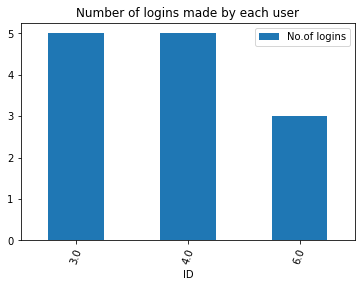

In [82]:
df3.plot.bar(x="ID", y="No.of logins", rot=70, title="Number of logins made by each user");

